## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
from tqdm import tqdm


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)

train_size = int(0.8 * len(fmnist_dataset_train))
val_size = int(0.2 * len(fmnist_dataset_train))
fmnist_dataset_train, fmnist_dataset_val = torch.utils.data.random_split(fmnist_dataset_train, [train_size, val_size]) 
                                                   
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
val_loader = torch.utils.data.DataLoader(fmnist_dataset_val, 
                                         batch_size=128,
                                         shuffle=True,
                                         num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [5]:
len(fmnist_dataset_test)

10000

In [6]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [1]:
from models import TinyNeuralNetwork

In [8]:
torchsummary.summary(TinyNeuralNetwork().to(device), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
              ReLU-2           [-1, 32, 24, 24]               0
         MaxPool2d-3           [-1, 32, 12, 12]               0
           Dropout-4           [-1, 32, 12, 12]               0
       BatchNorm2d-5           [-1, 32, 12, 12]              64
            Conv2d-6             [-1, 64, 8, 8]          51,264
              ReLU-7             [-1, 64, 8, 8]               0
         MaxPool2d-8             [-1, 64, 4, 4]               0
           Dropout-9             [-1, 64, 4, 4]               0
      BatchNorm2d-10             [-1, 64, 4, 4]             128
          Flatten-11                 [-1, 1024]               0
           Linear-12                   [-1, 10]          10,250
       LogSoftmax-13                   [-1, 10]               0
Total params: 62,538
Trainable params: 

Your experiments come here:

In [9]:
from utils_2 import train_loop, plot_results, calculate_test_accuracy

In [10]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.NLLLoss()
n_epoch = 10

# Your experiments, training and validation loops here
train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = train_loop(model=model, loss_func=loss_func, 
                                                                                                opt=opt, n_epoch=n_epoch,
                                                                                                train_loader=train_loader, val_loader=val_loader, 
                                                                                                device=device)

100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


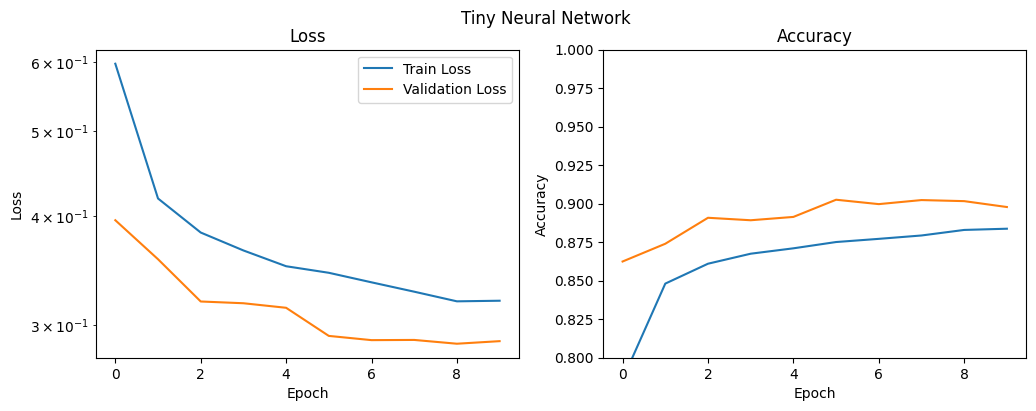

In [11]:
plot_results(train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, title='Tiny Neural Network')

In [12]:
calculate_test_accuracy(model, test_loader, device)

Accuracy : 0.8927734375


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [13]:
fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)

train_size = int(0.7 * len(fmnist_dataset_train))
val_size = int(0.3 * len(fmnist_dataset_train))
fmnist_dataset_train, fmnist_dataset_val = torch.utils.data.random_split(fmnist_dataset_train, [train_size, val_size]) 

train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
val_loader = torch.utils.data.DataLoader(fmnist_dataset_val, 
                                         batch_size=128,
                                         shuffle=True,
                                         num_workers=2)

In [1]:
from models import OverfittingNeuralNetwork

In [15]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 27, 27]             160
              ReLU-2           [-1, 32, 27, 27]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 12, 12]           8,256
              ReLU-5           [-1, 64, 12, 12]               0
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 5, 5]          32,896
              ReLU-8            [-1, 128, 5, 5]               0
         MaxPool2d-9            [-1, 128, 2, 2]               0
          Flatten-10                  [-1, 512]               0
           Linear-11                   [-1, 10]           5,130
       LogSoftmax-12                   [-1, 10]               0
Total params: 46,442
Trainable params: 46,442
Non-trainable params: 0
---------------------------------

In [16]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.NLLLoss()
n_epoch = 50

# Your experiments, training and validation loops here
train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = train_loop(model=model, loss_func=loss_func, 
                                                                                                opt=opt,n_epoch=n_epoch, 
                                                                                                train_loader=train_loader, val_loader=val_loader, 
                                                                                                device=device)
                                                                                                

100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


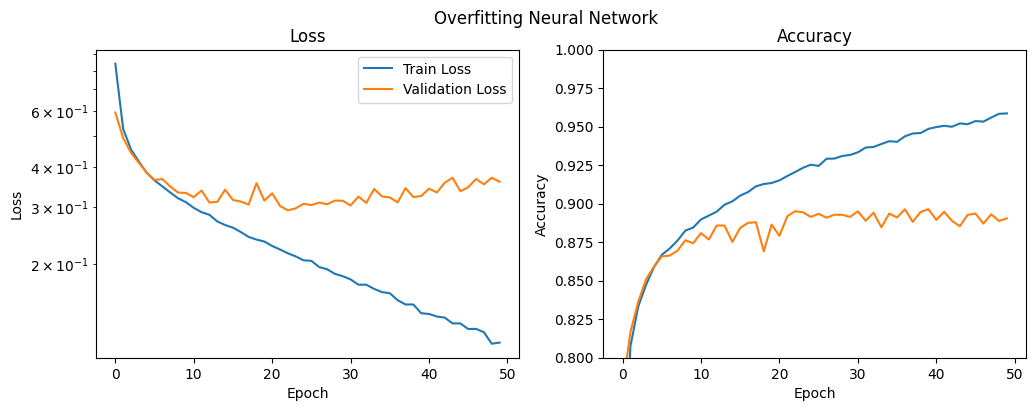

In [17]:
plot_results(train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, title='Overfitting Neural Network')

In [18]:
calculate_test_accuracy(model, test_loader, device)

Accuracy : 0.88564453125


### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [1]:
from models import FixedNeuralNetwork

In [20]:
torchsummary.summary(FixedNeuralNetwork().to(device), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 27, 27]             160
              ReLU-2           [-1, 32, 27, 27]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
         Dropout2d-4           [-1, 32, 13, 13]               0
       BatchNorm2d-5           [-1, 32, 13, 13]              64
            Conv2d-6           [-1, 64, 12, 12]           8,256
              ReLU-7           [-1, 64, 12, 12]               0
         MaxPool2d-8             [-1, 64, 6, 6]               0
         Dropout2d-9             [-1, 64, 6, 6]               0
      BatchNorm2d-10             [-1, 64, 6, 6]             128
           Conv2d-11            [-1, 128, 5, 5]          32,896
             ReLU-12            [-1, 128, 5, 5]               0
        MaxPool2d-13            [-1, 128, 2, 2]               0
        Dropout2d-14            [-1, 12

In [21]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.NLLLoss()
n_epoch = 50

# Your experiments, training and validation loops here
train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = train_loop(model=model, loss_func=loss_func, 
                                                                                                opt=opt,n_epoch=n_epoch, 
                                                                                                train_loader=train_loader, val_loader=val_loader, 
                                                                                                device=device)

100%|██████████| 50/50 [01:01<00:00,  1.24s/it]


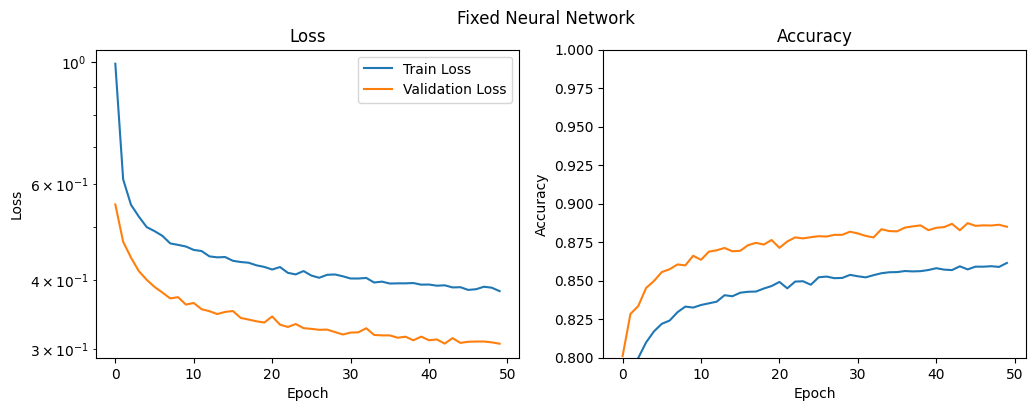

In [22]:
plot_results(train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, title='Fixed Neural Network')

In [29]:
calculate_test_accuracy(model, test_loader, device)

Accuracy : 0.87958984375


_Looks like test accuracy has dropped a little and in general accuracy scores on train and val decreased, even though overfitting problem has been conquered. \
Maybe we overdid regularization a little :( Let's fix it!_

In [38]:
from models import CompletelyFixedNeuralNetwork

In [39]:
model = CompletelyFixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.NLLLoss()
n_epoch = 50

# Your experiments, training and validation loops here
train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history = train_loop(model=model, loss_func=loss_func, 
                                                                                                opt=opt,n_epoch=n_epoch,
                                                                                                train_loader=train_loader, val_loader=val_loader, 
                                                                                                device=device)

100%|██████████| 50/50 [01:02<00:00,  1.25s/it]


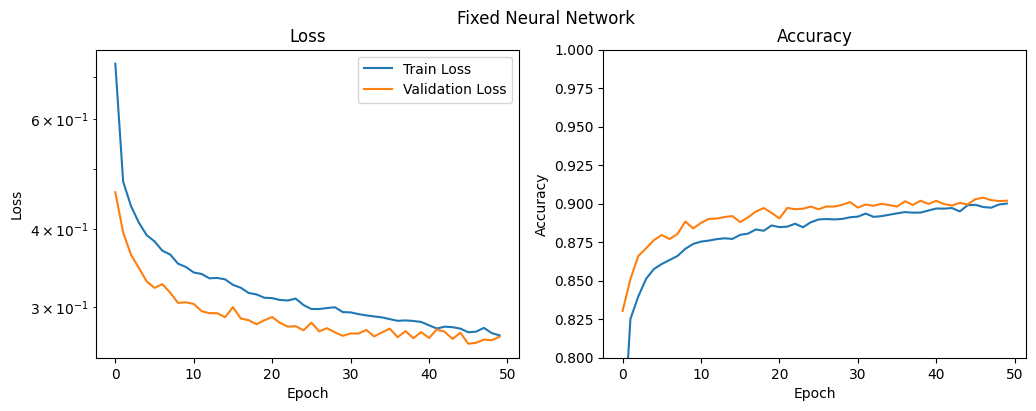

In [40]:
plot_results(train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, title='Completely Fixed Neural Network')

In [41]:
calculate_test_accuracy(model, test_loader, device)

Accuracy : 0.895703125


### Conclusions:
_Write down small report with your conclusions and your ideas._

_Task 1: two convolution layers (+activation function and maxpool) with dropout and batch normalization between them gave a desired test accuracy >= 0.885_ \
_Task 2: to create overfitting train set size has been reduced, number of epochs increased, model had only convolutional layers. Plots show that the desired effect has been reached: loss and accuracy decreases on train and increases on validation._ \
_Task 3: overfitting has been conquered by adding dropout and batch normalization, but lead to general decrease in accurace. Choosing $p=0.3$ in dropout instead of default $p=0.5$ fixed the problem._